In [113]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## 1. Создайте и заполните таблицу запросами, создайте техническое поле ID c параметрами INTEGER PRIMARY KEY AUTOINCREMENT.

In [3]:
con = sqlite3.connect('works.sqlite')
cursor = con.cursor()

In [4]:
cursor.execute("CREATE TABLE IF NOT EXISTS works (ID INTEGER PRIMARY KEY AUTOINCREMENT,salary INTEGER,educationType TEXT,jobTitle TEXT,qualification TEXT,gender TEXT,dateModify TEXT,skills TEXT,otherInfo TEXT)")

In [5]:
cursor.execute("pragma table_info(works)").fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'educationType', 'TEXT', 0, None, 0),
 (3, 'jobTitle', 'TEXT', 0, None, 0),
 (4, 'qualification', 'TEXT', 0, None, 0),
 (5, 'gender', 'TEXT', 0, None, 0),
 (6, 'dateModify', 'TEXT', 0, None, 0),
 (7, 'skills', 'TEXT', 0, None, 0),
 (8, 'otherInfo', 'TEXT', 0, None, 0)]

In [109]:
works = pd.read_csv("works.csv")
works

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
0,60000,Высшее,Специалист пресс-службы,Магистр,Мужской,2021-04-01,"<p>Аналитическое&nbsp;мышление,&nbsp;<span cla...",NaN
1,85000,Высшее,менеджер проектов,NaN,Мужской,2021-04-01,NaN,NaN
2,15000,Среднее профессиональное,....,NaN,Женский,2021-06-01,NaN,NaN
3,30000,NaN,NaN,NaN,Женский,2021-04-03,NaN,NaN
4,45000,NaN,NaN,NaN,Мужской,2021-06-28,NaN,NaN
...,...,...,...,...,...,...,...,...
32678,15000,NaN,NaN,NaN,Женский,2021-06-23,NaN,NaN
32679,13000,Среднее,уборщица,NaN,Женский,2021-07-29,NaN,NaN
32680,16000,Среднее профессиональное,кочегар машинист котельной,NaN,Мужской,2021-11-11,NaN,NaN
32681,35000,Высшее,NaN,NaN,Мужской,2020-04-21,NaN,NaN


In [7]:
works.to_sql("works", con, if_exists='append', index=False)

In [10]:
cursor.execute("SELECT * FROM works limit 5").fetchall()

[(1,
  60000,
  'Высшее',
  'Специалист пресс-службы',
  'Магистр',
  'Мужской',
  '2021-04-01',
  '<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',
  None),
 (2,
  85000,
  'Высшее',
  'менеджер проектов',
  None,
  'Мужской',
  '2021-04-01',
  None,
  None),
 (3,
  15000,
  'Среднее профессиональное',
  '....',
  None,
  'Женский',
  '2021-06-01',
  None,
  None),
 (4, 30000, None, None, None, 'Женский', '2021-04-03', None, None),
 (5, 45000, None, None, None, 'Мужской', '2021-06-28', None, None)]

## 2. Добавьте индекс на поле salary. Изменится ли после этого размер файла? На сколько?

In [8]:
cursor.execute('CREATE INDEX salary_index ON works(salary)')

In [14]:
#Размер файла изменился с 6,3МБ до 6,6

## 3. Выведите количество записей.

In [9]:
cursor.execute("SELECT COUNT(*) FROM works").fetchall()

[(32683,)]

## 4. Выведите количество мужчин и женщин.

In [10]:
cursor.execute("SELECT COUNT(*) FROM works WHERE gender='Мужской'").fetchone()

(13386,)

In [11]:
cursor.execute("SELECT COUNT(*) FROM works WHERE gender='Женский'").fetchone()

(17910,)

## 5. У скольки записей заполены skills?

In [12]:
cursor.execute("SELECT COUNT(*) FROM works WHERE skills IS NOT NULL").fetchone()

(8972,)

## 6. Получить заполненные скиллы. 

In [161]:
cursor.execute("SELECT * FROM works WHERE skills IS NOT NULL").fetchone()

(1,
 60000,
 'Специалист пресс-службы',
 'Магистр',
 '2021-04-01',
 'Аналитическоемышление,ответственность, стабильность психологического состояния и настроения.',
 None,
 1,
 1)

## 7. Вывести зарплату только у тех, у кого в скилах есть Python. 

In [14]:
cursor.execute("SELECT salary FROM works WHERE skills LIKE '%python%'").fetchall()

[(35000,),
 (20000,),
 (35000,),
 (15000,),
 (25000,),
 (90000,),
 (30000,),
 (50000,),
 (23000,),
 (23000,)]

## 8. Построить перцентили и разброс по з/п у мужчин и женщин.

In [23]:
cursor.execute('SELECT salary FROM works WHERE gender = "Мужской"')
men_list = [i[0] for i in cursor.fetchall()]
men_salary = np.quantile(men_list, np.linspace(.1, 1, 10))
men_salary

array([  15000.,   20000.,   25000.,   30000.,   30000.,   35000.,
         40000.,   50000.,   60000., 1000000.])

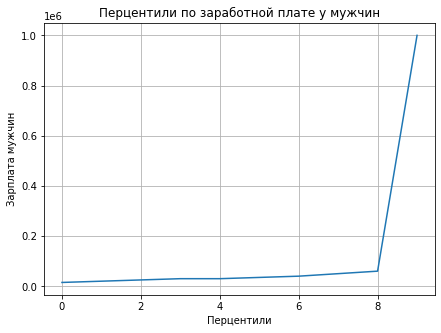

In [27]:
plt.figure(figsize=(7, 5)) 
plt.title('Перцентили по заработной плате у мужчин') 
plt.xlabel('Перцентили') 
plt.ylabel('Зарплата мужчин') 
plt.grid() 

plt.plot(men_salary)  
plt.show()

In [24]:
cursor.execute('SELECT salary FROM works WHERE gender = "Женский"')
women_list = [i[0] for i in cursor.fetchall()]
women_salary = np.quantile(women_list, np.linspace(.1, 1, 10))
women_salary

array([ 15000.,  18000.,  20000.,  22000.,  25000.,  30000.,  30000.,
        35000.,  47000., 900000.])

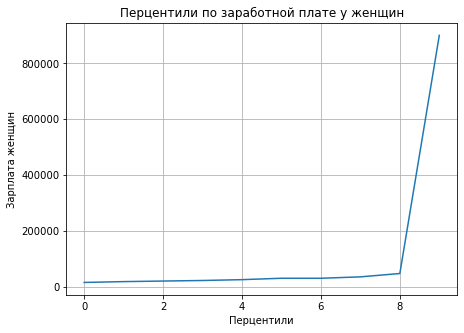

In [28]:
plt.figure(figsize=(7, 5)) 
plt.title('Перцентили по заработной плате у женщин') 
plt.xlabel('Перцентили') 
plt.ylabel('Зарплата женщин') 
plt.grid() 

plt.plot(women_salary)  
plt.show()

## 9. Построить графики распределения по заработной плате мужчин и женщин в зависимости от высшего образования.

In [48]:
men_height = np.asarray(cursor.execute("SELECT salary FROM works WHERE gender='Мужской' and educationType='Высшее'").fetchall())
men_height

array([[ 60000],
       [ 85000],
       [100000],
       ...,
       [ 40000],
       [ 40000],
       [ 35000]])

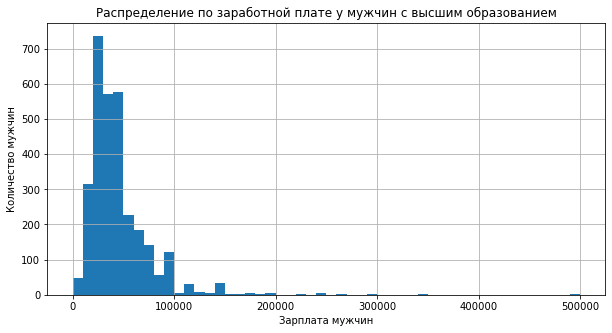

In [49]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по заработной плате у мужчин с высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(men_height, 
         bins=50) 
plt.show()

In [50]:
men_not_height = np.asarray(cursor.execute("SELECT salary FROM works WHERE gender='Мужской' and educationType='Незаконченное высшее'").fetchall())

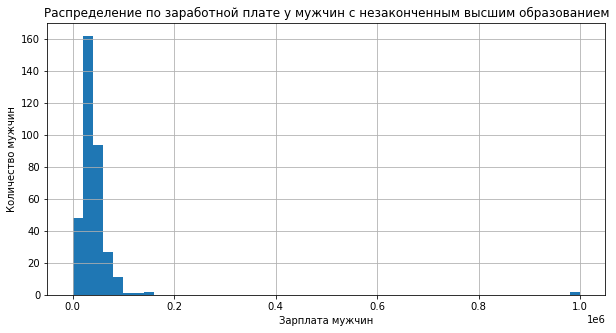

In [51]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у мужчин с незаконченным высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(men_not_height, 
         bins=50) 
plt.show()

In [52]:
men_mean = np.asarray(cursor.execute("SELECT salary FROM works WHERE gender='Мужской' and educationType='Среднее'").fetchall())

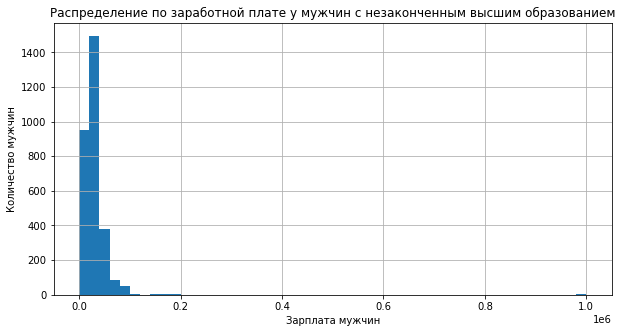

In [53]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у мужчин с незаконченным высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(men_mean, 
         bins=50) 
plt.show()

In [56]:
men_mean_prof = np.asarray(cursor.execute("SELECT salary FROM works WHERE gender='Мужской' and educationType='Среднее профессиональное'").fetchall())

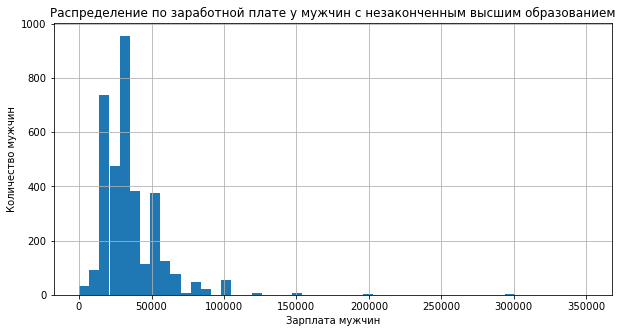

In [57]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у мужчин с незаконченным высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(men_mean_prof, 
         bins=50) 
plt.show()

In [58]:
women_height = np.asarray(cursor.execute("SELECT salary FROM works WHERE gender='Женский' and educationType='Высшее'").fetchall())

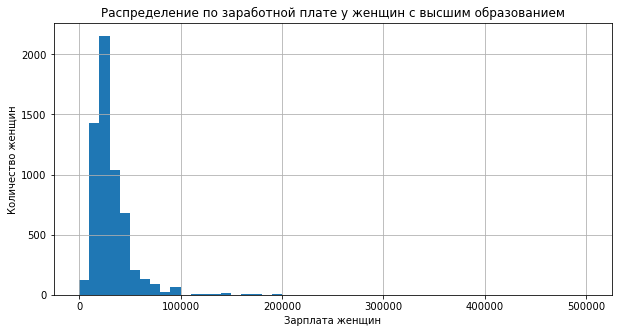

In [59]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(women_height, 
         bins=50) 
plt.show()

In [60]:
women_not_height = np.asarray(cursor.execute("SELECT salary FROM works WHERE gender='Женский' and educationType='Незаконченное высшее'").fetchall())

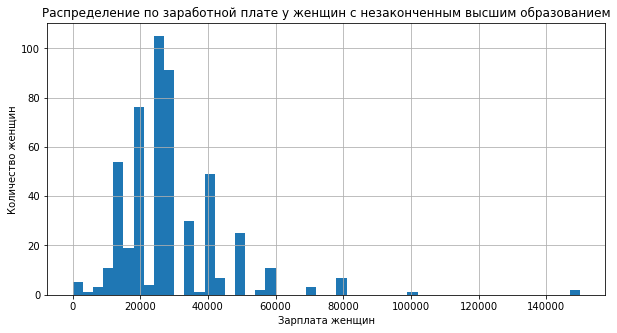

In [61]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с незаконченным высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(women_not_height, 
         bins=50) 
plt.show()

In [62]:
women_mean = np.asarray(cursor.execute("SELECT salary FROM works WHERE gender='Женский' and educationType='Среднее'").fetchall())

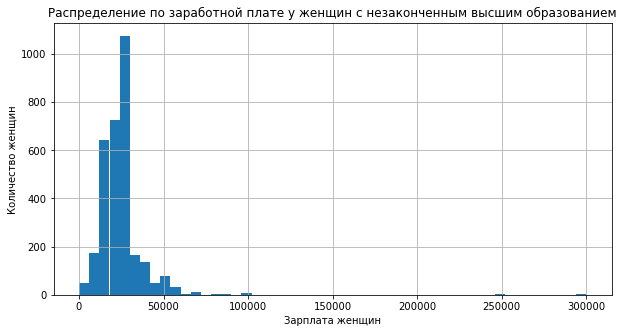

In [63]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с незаконченным высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(women_mean, 
         bins=50) 
plt.show()

In [64]:
women_mean_prof = np.asarray(cursor.execute("SELECT salary FROM works WHERE gender='Женский' and educationType='Среднее профессиональное'").fetchall())

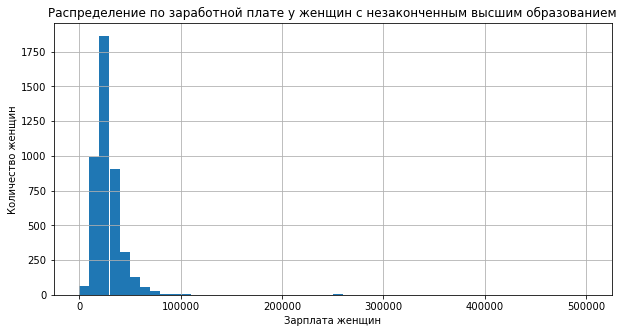

In [65]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с незаконченным высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(women_mean_prof, 
         bins=50) 
plt.show()

# ДЗ

## Создайте таблицу с гендером.

In [68]:
cursor.execute("CREATE TABLE IF NOT EXISTS genders(id INTEGER PRIMARY KEY AUTOINCREMENT, gender TEXT)").fetchall()

[]

In [69]:
cursor.execute("pragma table_info(genders)").fetchall()

[(0, 'id', 'INTEGER', 0, None, 1), (1, 'gender', 'TEXT', 0, None, 0)]

In [72]:
cursor.execute('INSERT INTO genders(gender) SELECT DISTINCT gender FROM works WHERE gender IS NOT NULL')

In [73]:
cursor.execute('ALTER TABLE works ADD COLUMN gender_id INTEGER REFERENCES genders(id)')

In [74]:
cursor.execute('UPDATE works SET gender_id = (SELECT id FROM genders WHERE gender = works.gender)')

In [75]:
cursor.execute('ALTER TABLE works DROP COLUMN gender')

In [76]:
cursor.execute("pragma table_info(works)").fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'educationType', 'TEXT', 0, None, 0),
 (3, 'jobTitle', 'TEXT', 0, None, 0),
 (4, 'qualification', 'TEXT', 0, None, 0),
 (5, 'dateModify', 'TEXT', 0, None, 0),
 (6, 'skills', 'TEXT', 0, None, 0),
 (7, 'otherInfo', 'TEXT', 0, None, 0),
 (8, 'gender_id', 'INTEGER', 0, None, 0)]

In [78]:
cursor.execute("SELECT * FROM works limit 2").fetchall()

[(1,
  60000,
  'Высшее',
  'Специалист пресс-службы',
  'Магистр',
  '2021-04-01',
  '<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',
  None,
  1),
 (2, 85000, 'Высшее', 'менеджер проектов', None, '2021-04-01', None, None, 1)]

In [84]:
cursor.execute("SELECT * FROM genders limit 5").fetchall()

[(1, 'Мужской'),
 (2, 'Женский'),
 (3, 'Мужской'),
 (4, 'Женский'),
 (5, 'Мужской')]

## Создайте таблицу для образования.

In [85]:
cursor.execute('CREATE TABLE IF NOT EXISTS education(id INTEGER PRIMARY KEY AUTOINCREMENT, type_educate TEXT)')

In [90]:
cursor.execute('INSERT INTO education(type_educate) SELECT DISTINCT educationType FROM works WHERE educationType IS NOT NULL')

In [94]:
cursor.execute('ALTER TABLE works ADD COLUMN education_id INTEGER REFERENCES education(id)')

In [100]:
cursor.execute('UPDATE works SET education_id = (SELECT id FROM education WHERE type_educate = works.educationType)')

In [104]:
cursor.execute('ALTER TABLE works DROP COLUMN educationType')

In [105]:
cursor.execute("pragma table_info(works)").fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'jobTitle', 'TEXT', 0, None, 0),
 (3, 'qualification', 'TEXT', 0, None, 0),
 (4, 'dateModify', 'TEXT', 0, None, 0),
 (5, 'skills', 'TEXT', 0, None, 0),
 (6, 'otherInfo', 'TEXT', 0, None, 0),
 (7, 'gender_id', 'INTEGER', 0, None, 0),
 (8, 'education_id', 'INTEGER', 0, None, 0)]

In [106]:
cursor.execute("SELECT * FROM works limit 2").fetchall()

[(1,
  60000,
  'Специалист пресс-службы',
  'Магистр',
  '2021-04-01',
  '<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',
  None,
  1,
  1),
 (2, 85000, 'менеджер проектов', None, '2021-04-01', None, None, 1, 1)]

In [107]:
cursor.execute("SELECT * FROM education limit 5").fetchall()

[(1, 'Высшее'),
 (2, 'Среднее профессиональное'),
 (3, 'Среднее'),
 (4, 'Незаконченное высшее'),
 (5, 'Высшее')]

## Очистить поля skills и otherInfo от HTML.

In [152]:
works1 = cursor.execute("SELECT ID, skills, otherInfo FROM works").fetchall()

In [156]:
clear_works = []
for id, skill, other_info in works1:
    if skill is not None:
        skill = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', skill)
    if other_info is not None:   
        other_info = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', other_info)
    clear_works.append((skill, other_info, id))

In [159]:
cursor.executemany("UPDATE works SET skills = ?, otherInfo = ? WHERE ID = ?", clear_works)

In [160]:
cursor.execute("SELECT * FROM works limit 2").fetchall()

[(1,
  60000,
  'Специалист пресс-службы',
  'Магистр',
  '2021-04-01',
  'Аналитическоемышление,ответственность, стабильность психологического состояния и настроения.',
  None,
  1,
  1),
 (2, 85000, 'менеджер проектов', None, '2021-04-01', None, None, 1, 1)]